# Euler Method

In [14]:
import numpy as np

import matplotlib.pyplot as plt

- Wikipedia: [Euler method](https://en.wikipedia.org/wiki/Euler_method)
- Wikipedia: [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method)

In mathematics and computational science, the Euler method (also called the forward Euler method) is a first-order numerical procedure for solving ordinary differential equations (ODEs) with a given initial value.

Let $I = [t_a, t_b]$ be an interval of $\mathbb{R}$ and $f$ a real function defined on $I \times \mathbb{R}$.

$$
\left\{
    \begin{array}{ll}
        \forall t \in I, y'(t) = f(t, y(t)) \\
        y_a = y(t_a)
    \end{array}
\right.
$$

The Euler method gives an approximate solution at $n$ evenly separated points $\{x_i\}_{i \in \{0,n\}}$ of $I$ defined in this way: $x_i = a + i\frac{b-a}{n}$.

These values are noted $\{y_i\}_{i \in \{0,n\}}$.

## Explicit

The explicit Euler method makes use of the approximation of the derivative:

$$
y'(x_{i}) \approx \frac{y(x_{i+1}) - y(x_{i})}{x_{i+1} - x_{i}}, \forall i \in {0, n-1}
$$

The previous problem becomes:

$$
\frac{y(x_{i+1}) - y(x_{i})}{x_{i+1} - x_{i}} = f(x_{i}, y_{i}) \implies y_{i+1} = y_{i} + (x_{i+1} - x_{i})f(x_{i}, y_{i}), \forall i \in {0, n-1}
$$

In [15]:
def explicit_euler_method(i, n, f, y_0):
    """
    First order Explicit Euler method.

    Parameters
    ----------
    i : List | Tuple
        Resolution interval
        Etample: [-1,1] 
    n : int
        Number of valuation points
    f : function
        Function f in the etpression of the ODE
    y_0 : float
        Initial value
    Returns
    -------
    List, List
        Valuation points, 
    """
    t = np.linspace(i[0], i[1], n)
    y = [y_0]

    for i in range(len(t)-1):
        y.append(y[i] + (t[i+1] - t[i]) * f(t[i], y[i]))

    return t, y

In [16]:
i = [-1, 1]
n = 1000
d_y = lambda t: t*t
f = lambda t, y: 2*t
y_0 = 1

t, y = explicit_euler_method(i, n, f, y_0)
y_true = [d_y(t_i) for t_i in t]

mse = np.sum([(y_i - y_t)**2 for y_i, y_t in list(zip(y, y_true))])

Text(0.5, 1.0, 'MSE = 0.005346690704052865')

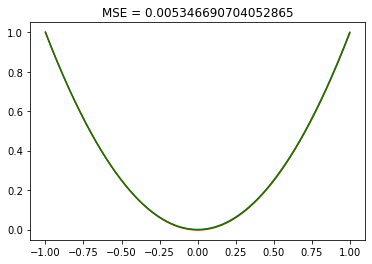

In [17]:
plt.plot(t, y, color="red")
plt.plot(t, y_true, color="green")
plt.title(f"MSE = {mse}")

## Implicit

The implicit Euler method makes use of the same approximation of the derivative but one step ahead:

$$
y'(x_{i+1}) \approx \frac{y(x_{i+1}) - y(x_{i})}{x_{i+1} - x_{i}}, \forall i \in {0, n-1}
$$

The previous problem becomes:

$$
\frac{y(x_{i+1}) - y(x_{i})}{x_{i+1} - x_{i}} = f(x_{i+1}, y_{i+1}) \implies y_{i+1} = y_{i} + (x_{i+1} - x_{i})f(x_{i+1}, y_{i+1}), \forall i \in {0, n-1}
$$

We notice that $y_{i+1}$ is present on both ends of the equation so we have to find a way to compute it.

The Newton's method is a simple way to find a good approximation of the root of a function.

It is possible to use Newton's method in order to compute $y_{i+1}$ at each step by solving:

$$
0 = y_{i} + (x_{i+1} - x_{i})f(x_{i+1}, y_{i+1}) - y_{i+1}, \forall i \in {0, n-1}
$$

In [18]:
def newton_method(x0, f, f_prime, tolerance, epsilon, max_iterations):
    """
    Newton's method.

    Parameters
    ----------
    x0 : float
        Initial guess
    f : function
        Function whose root we are trying to find
    f_prime : function
        Derivative of the function
    tolerance : float
        Tolerance
    epsilon : float
        Limit
    max_iterations : int
        Maximum number of iterations to execute

    Returns
    -------
    float
        Root of the function
    """
    for i in range(max_iterations):
        y = f(x0)
        yprime = f_prime(x0)

        if abs(yprime) < epsilon:       # Stop if the denominator is too small
            break

        x1 = x0 - y / yprime            # Do Newton's computation

        if abs(x1 - x0) <= tolerance:   # Stop when the result is within the desired tolerance
            return x1                   # x1 is a solution within tolerance and maximum number of iterations

        x0 = x1                         # Update x0 to start the process again

    return None                         # Newton's method did not converge

In [19]:
def implicit_euler_method(i, n, f, f_prime_y, y_0):
    """
    First order Explicit Euler method.

    Parameters
    ----------
    i : List | Tuple
        Resolution interval
        Etample: [-1,1] 
    n : int
        Number of valuation points
    f : function
        Function f in the etpression of the ODE
    f_prime_y : function
        Derivative of function f relatively to the second variable (y)
    y_0 : float
        Initial value
    Returns
    -------
    List, List
        Valuation points, 
    """
    t = np.linspace(i[0], i[1], n)
    y = [y_0]

    for i in range(len(t)-1):
        f_root = lambda x: y[-1] + (t[i+1] - t[i]) * f(t[i+1], x) - x
        f_root_prime = lambda x: (t[i+1] - t[i]) * f_prime_y(t[i+1], x) - 1
        yy = newton_method(y[-1], f_root, f_root_prime, 10**-20, 10**-20, 10**9)
        y.append(yy)

    return t, y

In [20]:
i = [-1, 1]
n = 1000
d_y = lambda t: t*t
f = lambda t, y: 2*t
f_prime_y = lambda t, y: 0
y_0 = 1

t, y = implicit_euler_method(i, n, f, f_prime_y, y_0)
y_true = [d_y(t_i) for t_i in t]

mse = np.sum([(y_i - y_t)**2 for y_i, y_t in list(zip(y, y_true))])

Text(0.5, 1.0, 'MSE = 0.005346690704054595')

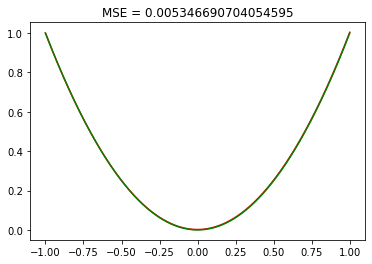

In [21]:
plt.plot(t, y, color="red")
plt.plot(t, y_true, color="green")
plt.title(f"MSE = {mse}")